In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import VotingRegressor
from sklearn.impute import SimpleImputer


In [5]:
df=pd.read_csv('/content/Walmart_Sales.csv')

In [6]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [7]:
df=df.drop(columns=['Date','Holiday_Flag','Unemployment'])

In [8]:
df

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI
0,1,1643690.90,42.31,2.572,211.096358
1,1,1641957.44,38.51,2.548,211.242170
2,1,1611968.17,39.93,2.514,211.289143
3,1,1409727.59,46.63,2.561,211.319643
4,1,1554806.68,46.50,2.625,211.350143
...,...,...,...,...,...
6430,45,713173.95,64.88,3.997,192.013558
6431,45,733455.07,64.89,3.985,192.170412
6432,45,734464.36,54.47,4.000,192.327265
6433,45,718125.53,56.47,3.969,192.330854


In [11]:
df.isnull().sum()

,0
Store,0
Weekly_Sales,0
Temperature,0
Fuel_Price,0
CPI,0


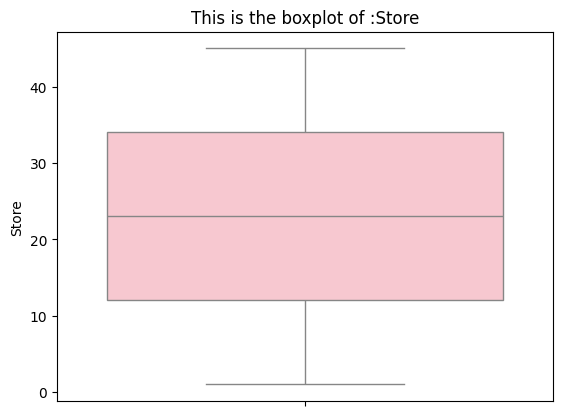

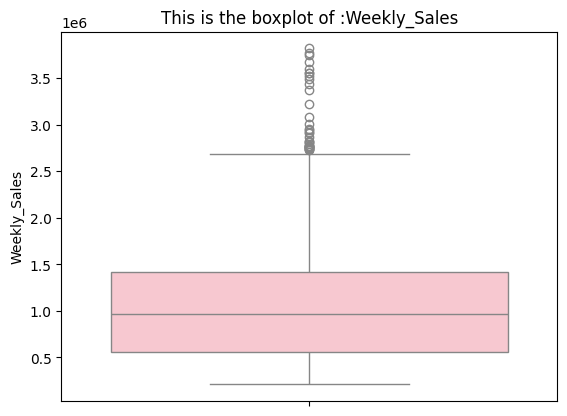

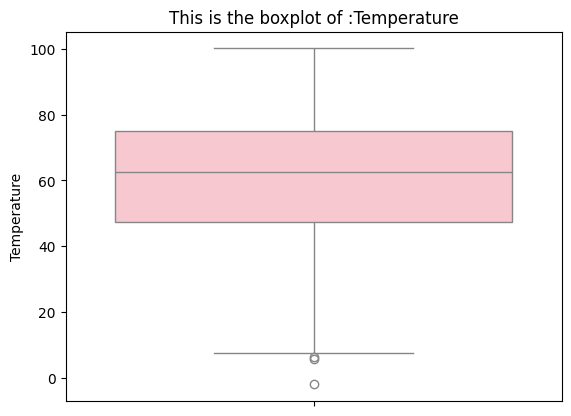

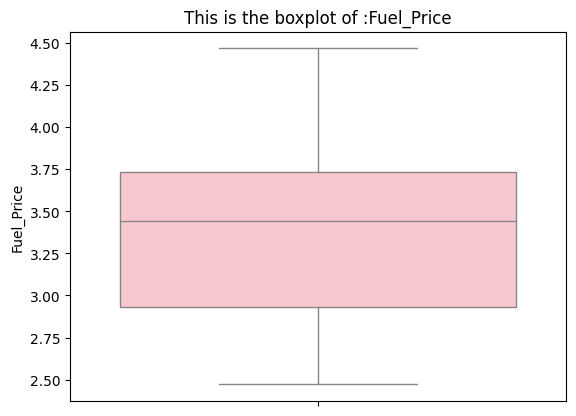

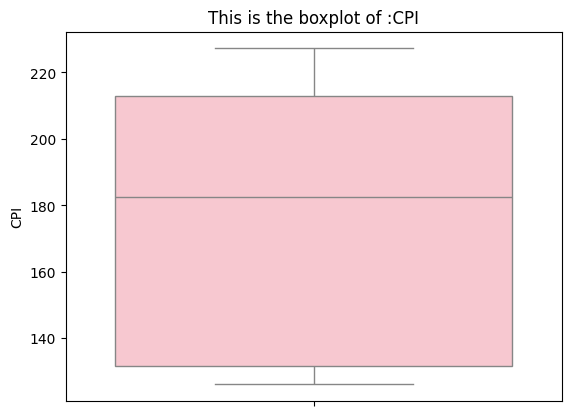

In [17]:
for i in df.columns:
  sns.boxplot(y=df[i],color='pink')
  plt.title("This is the boxplot of :" +str(i))
  plt.show()


In [19]:
x=df.drop(columns=['Weekly_Sales'])
y=df['Weekly_Sales']

In [20]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
clf1=LinearRegression()
clf2=DecisionTreeRegressor()
clf3=RandomForestRegressor()

In [24]:
est=[('lr',clf1),('dt',clf2),('rf',clf3)]

In [29]:
for estimators in est:

  cross=cross_val_score(estimators[1],xtr,ytr,cv=10)
  print(estimators[0],np.round(np.mean(cross),2))

lr 0.13
dt 0.88
rf 0.93


In [30]:
vr=VotingRegressor(estimators=est)

In [33]:
cross=cross_val_score(vr,xtr,ytr,scoring='r2',cv=10)
print("Voting regressor",np.round(np.mean(cross),2))

Voting regressor 0.84


In [54]:
z=vr.fit(xtr,ytr)

In [36]:
#have to predict on given data
predict=vr.predict(xte)


In [38]:
r2=r2_score(yte,predict)
print(r2)

0.850120233479211


In [46]:
# Use input() to get a string from the user
input_string = input("enter all values for the prediction: ")

# The next line assumes input_string is a string, which it will be after using input()
arr_str = input_string.split()

enter all values for the prediction: 1 45 2 200


In [51]:
arr_np = np.array(arr_str, dtype=float)
arr=arr_np.reshape(1,-1)

In [52]:
vr.predict(arr)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1489324.57805061])

In [55]:
pipe=make_pipeline(vr,est,z,predict)


In [57]:
print(pipe)

Pipeline(steps=[('votingregressor-1',
                 VotingRegressor(estimators=[('lr', LinearRegression()),
                                             ('dt', DecisionTreeRegressor()),
                                             ('rf', RandomForestRegressor())])),
                ('list',
                 [('lr', LinearRegression()), ('dt', DecisionTreeRegressor()),
                  ('rf', RandomForestRegressor())]),
                ('votingregressor-2',
                 VotingRegressor(estimators=[('lr', LinearRegression()),
                                             ('dt', DecisionTreeRegressor()),
                                             ('rf', RandomForestRegressor())])),
                ('ndarray',
                 array([1155608.27962149, 1287161.11631786, 1648348.01560227, ...,
        706061.76068427, 1666405.78669117,  957276.67481628]))])
